In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

In [16]:
#create a dataframe from a file using pandas
file = '../Resources/Capitals.csv'
# The correct encoding must be used to read the CSV in pandas
weather = pd.read_csv(file, encoding="ISO-8859-1")
weather.reset_index(inplace=True)
weather.columns

Index(['index', 'Country', 'Cities', 'Country Code'], dtype='object')

In [17]:
# set up additional columns to hold information
weather['Temperature'] = ""

base_url = "http://api.openweathermap.org/data/2.5/weather?"

#print(response['main']['temp'])
# use iterrows to iterate through pandas dataframe
for index, row in weather.iterrows():

    # iterate thru each row of the file
    city = row['Cities']
    url = base_url + "appid=" + "082ff2cde1d396b2b896b2335daad199" + "&q=" + city +"&units=imperial"

# assemble url and make API request
    response = requests.get(url).json()
   
    #update the dataframe 
    try:
        weather.loc[index, 'Temperature'] = response['main']['temp']
        print(response['main']['temp'])
    except (KeyError, IndexError):
        print("Missing field/result... skipping.")

50
Missing field/result... skipping.
80.73
37.94
80.6
Missing field/result... skipping.
72.9
48.2
49.73
49.57
53.6
37.67
81
63.89
31.51
28.4
48.9
83.41
68
25.41
93.2
44.6
66.2
82.4
79.2
43.95
91.4
61.01
80.6
77
31.66
73.4
82.4
93.2
55.4
44.87
60.8
42.76
73.4
73.4
79.37
82.22
51.51
74.21
Missing field/result... skipping.
40.01
33.21
80.6
30.2
81.64
81.62
61.75
60.33
84.52
43.9
62.99
60.47
33.35
56.64
Missing field/result... skipping.
84.2
30.94
49.73
75.2
84.2
77
53.6
38.46
100.4
76.89
39.02
71.6
79.91
78.8
83.23
Missing field/result... skipping.
82.74
54.43
39.69
77
79.63
57.76
66.2
41.67
Missing field/result... skipping.
48.76
32.38
43.36
55.36
33.8
64.06
Missing field/result... skipping.
Missing field/result... skipping.
66.2
55.4
80.6
32.54
55.51
38.96
80.6
51.13
45.32
34.86
47.16
53.6
64.4
66.27
78.31
50.03
87.8
57.42
81.55
71.6
46.4
76.59
50.52
49.46
12.2
53.6
53.47
73.4
Missing field/result... skipping.
62.92
Missing field/result... skipping.
60.8
44.33
66.61
96.8
95
87.8
42.69
4

In [18]:
weather.head()

,index,Country,Cities,Country Code,Temperature
0,0,Afghanistan,Kabul,AF,50
1,1,Albania,Tirana (Tirane),AL,
2,2,Algeria,Algiers,DZ,80.73
3,3,Andorra,Andorra la Vella,AD,37.94
4,4,Angola,Luanda,AO,80.6


In [19]:
weather.to_csv('../Outputs/WeatherbyCity.csv')

In [20]:
happiness = '../Resources/WorldHappinessReport.csv'
happinessReport = pd.read_csv(happiness)

happinessnew = happinessReport[['country', 'year', 'Life Ladder']].copy()
happinessnew.head()

,country,year,Life Ladder
0,Afghanistan,2008,3.723590
1,Afghanistan,2009,4.401778
2,Afghanistan,2010,4.758381
3,Afghanistan,2011,3.831719
4,Afghanistan,2012,3.782938


In [21]:
happinessnew_2017 = happinessnew[happinessnew['year']== 2017]
happinessnew_2017 = happinessnew_2017.rename(columns={'country': 'Country'})
happinessnew_2017.head()


,Country,year,Life Ladder
9,Afghanistan,2017,2.661718
19,Albania,2017,4.639548
25,Algeria,2017,5.248912
41,Argentina,2017,6.039330
53,Armenia,2017,4.287736


In [22]:
DF=pd.merge(weather, happinessnew_2017, on="Country", how='inner',suffixes=("","") )
DF['Temperature'] = pd.to_numeric(DF['Temperature'],errors='coerce')
DF.head()

,index,Country,Cities,Country Code,Temperature,year,Life Ladder
0,0,Afghanistan,Kabul,AF,50.00,2017,2.661718
1,1,Albania,Tirana (Tirane),AL,NaN,2017,4.639548
2,2,Algeria,Algiers,DZ,80.73,2017,5.248912
3,6,Argentina,Buenos Aires,AR,72.90,2017,6.039330
4,7,Armenia,Yerevan,AM,48.20,2017,4.287736


How much does weather impact the happiness of a country?  R sqr= nan P-Value= nan


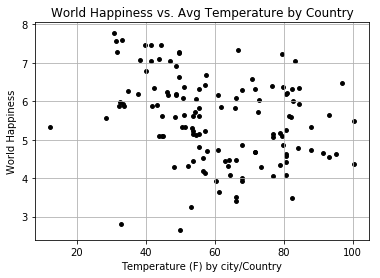

In [30]:
plt.scatter(DF["Temperature"], DF["Life Ladder"], c="black", marker="o", s=15)

plt.title("World Happiness vs. Avg Temperature by Country")
plt.xlabel("Temperature (F) by city/Country")
plt.ylabel("World Happiness")
plt.grid(True)

#regression
(slope, intercept, r, p, error) = linregress(DF['Temperature'], DF["Life Ladder"])
print("How much does weather impact the happiness of a country?  R sqr= " 
      + str(r) + ' P-Value= ' + str(p))

fit = slope * DF["Temperature"] + intercept

#ax.plot(X_axis, Y_axis, linewidth=0, marker='o') #plot each instance
#ax.plot(year, fit, 'r--') #plot the regresion calc, with a red dotted line
#plt.show()